In [38]:
import os
import numpy as np
import re
import requests
import tarfile
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

In [39]:
data=pd.read_csv('alll.csv')
data.head()

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
0,s694813024,p00000,u706566315,1540908251,Rust,Rust,rs,Wrong Answer,0.0,5012.0,120,0/1
1,s554950692,p00000,u706566315,1540908314,Rust,Rust,rs,Accepted,0.0,5004.0,124,1/1
2,s555203498,p00000,u759934006,1513417513,Rust,Rust,rs,Accepted,0.0,5020.0,136,1/1
3,s309783173,p00000,u233505136,1516826051,Rust,Rust,rs,Accepted,0.0,5004.0,123,1/1
4,s184977351,p00000,u191088660,1517740150,Rust,Rust,rs,Accepted,0.0,5004.0,122,1/1


**Download and extract**

In [40]:
file_name = "Project_CodeNet_Java250.tar.gz"
data_url = f"https://dax-cdn.cdn.appdomain.cloud/dax-project-codenet/1.0.0/{file_name}"

# Download tar archive to local disk
with open(file_name, "wb") as f:
    f.write(requests.get(data_url).content)

# # Extract contents of archive to local disk
# if os.path.exists("data"):
#     shutil.rmtree("data")
# with tarfile.open(file_name) as tf:
#     tf.extractall()

In [41]:
code=[]
root='Project_CodeNet_Java250'
for folder in os.listdir(root):
  sub_folder=os.path.join(root,folder)
  for file_name in os.listdir(sub_folder):
    with open(os.path.join(sub_folder,file_name),encoding='utf-8') as f:
      text=f.read()
    text=re.sub('//.*?\n','',text)
    text=re.sub('/.*?/','',text)
    code.append([folder,file_name.split('.')[0],text])

code=pd.DataFrame(code,columns=['problem_id','submission_id','code'])

In [13]:
print(code['code'][0])#展示一个代码段

import java.util.Scanner;
import java.util.Arrays;

public class Main{
	public static void main(String[] args){
		Scanner scan = new Scanner(System.in);
		int[] heights = new int[10];
		for(int i = 0; i < 10; i++){
			heights[i] = scan.nextInt();
		}

		Arrays.sort(heights);
		for(int i = 9; i >= 7; i--){
			System.out.println(heights[i]);
		}
	}
}


In [14]:
from collections import Counter
frequency=Counter(re.split(r'[;\s]+',code['code'][:10000].sum()))

In [15]:
mapping=dict(frequency.most_common(1000))
vocab=mapping.keys()
mapping={k:v for v,k in enumerate(vocab)}

In [16]:
def string_to_vect(string):
  words=re.split(r'[;\s]+',string)
  vect=[mapping.get(word,0) for word in words][:1000]
  lens=len(vect)
  if lens<1000:
    for _ in range(1000-lens):
      vect.append(0)
  return vect

In [17]:
code['vect']=code['code'].map(string_to_vect)

In [18]:
code

,problem_id,submission_id,code,vect
0,p00001,s005618736,import java.util.Scanner;\nimport java.util.Ar...,"[10, 26, 10, 151, 4, 11, 52, 4, 6, 9, 13, 71, ..."
1,p00001,s007352793,/* package whatever; \nimport java.util.*;\nim...,"[369, 0, 0, 10, 67, 10, 426, 10, 79, 11, 15, 2..."
2,p00001,s007595410,import java.io.BufferedReader;\nimport java.io...,"[10, 58, 10, 68, 10, 59, 10, 151, 4, 11, 15, 2..."
3,p00001,s008485993,import java.util.ArrayList;\nimport java.util....,"[10, 150, 10, 306, 10, 257, 10, 26, 11, 15, 2,..."
4,p00001,s013394985,import java.util.Arrays;\nimport java.util.Sca...,"[10, 151, 10, 26, 4, 11, 15, 2, 6, 17, 41, 0, ..."
...,...,...,...,...
74995,p04044,s982532402,import java.util.Arrays;\nimport java.util.Sca...,"[10, 151, 10, 26, 4, 11, 15, 2, 4, 6, 9, 13, 1..."
74996,p04044,s984943858,import java.io.BufferedReader;\nimport java.io...,"[10, 58, 10, 68, 10, 0, 10, 462, 10, 0, 10, 0,..."
74997,p04044,s986869927,import java.io.BufferedReader;\nimport java.io...,"[10, 58, 10, 68, 10, 59, 10, 462, 10, 151, 10,..."
74998,p04044,s993597985,import java.util.ArrayList;\nimport java.util....,"[10, 150, 10, 306, 10, 26, 4, 11, 15, 2, 4, 6,..."


**table data**

In [19]:
data.head()

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
0,s694813024,p00000,u706566315,1540908251,Rust,Rust,rs,Wrong Answer,0.0,5012.0,120,0/1
1,s554950692,p00000,u706566315,1540908314,Rust,Rust,rs,Accepted,0.0,5004.0,124,1/1
2,s555203498,p00000,u759934006,1513417513,Rust,Rust,rs,Accepted,0.0,5020.0,136,1/1
3,s309783173,p00000,u233505136,1516826051,Rust,Rust,rs,Accepted,0.0,5004.0,123,1/1
4,s184977351,p00000,u191088660,1517740150,Rust,Rust,rs,Accepted,0.0,5004.0,122,1/1


In [20]:
data=data.query('accuracy=="1/1"&status=="Accepted"')

In [21]:
data

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
1,s554950692,p00000,u706566315,1540908314,Rust,Rust,rs,Accepted,0.0,5004.0,124,1/1
2,s555203498,p00000,u759934006,1513417513,Rust,Rust,rs,Accepted,0.0,5020.0,136,1/1
3,s309783173,p00000,u233505136,1516826051,Rust,Rust,rs,Accepted,0.0,5004.0,123,1/1
4,s184977351,p00000,u191088660,1517740150,Rust,Rust,rs,Accepted,0.0,5004.0,122,1/1
5,s171709297,p00000,u444102531,1518453505,Rust,Rust,rs,Accepted,0.0,5008.0,108,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1944461,s506261030,p02525,u358792510,1340468710,C,C,c,Accepted,0.0,0.0,416,1/1
1944462,s548967462,p02525,u975905396,1341066552,C,C,c,Accepted,0.0,0.0,560,1/1
1944824,s751921273,p02525,u444904956,1335601711,C++,C++,cpp,Accepted,0.0,0.0,378,1/1
1944825,s868124794,p02525,u055278086,1337230147,C++,C++,cpp,Accepted,0.0,0.0,493,1/1


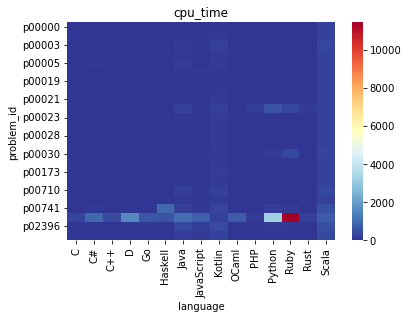

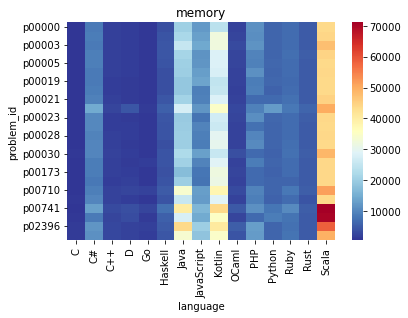

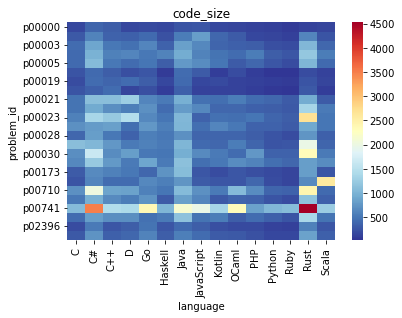

In [22]:
#建议注释 没什么用
ct=pd.crosstab(data['problem_id'],data['language'],values=data['code_size'],aggfunc='mean')

for var in ['cpu_time','memory','code_size']:
    ct=pd.crosstab(data['problem_id'],data['language'],values=data[var],aggfunc='mean')
    sns.heatmap(ct.dropna(),cmap='RdYlBu_r')
    plt.title(var)
    plt.show()

In [ ]:
array=np.arange(0,8500,500)
data['cat_code']=pd.cut(data['code_size'],bins=array)

fig,ax=plt.subplots(5,2,figsize=[15,30])
for row,language in enumerate(['C++','C','Python','Java','All']):
    for col,variable in enumerate(['cpu_time','memory']):
        if language!='All':
            df=data.query('language=="{}"'.format(language))
        else:
            df=data
        sns.boxplot(data=df,y='cat_code',x=variable,ax=ax[row,col],palette='RdYlBu_r',whis=[0,50])
        ax[row,col].set_xscale('log')
        ax[row,col].set_xlabel(variable,fontsize=15)
        ax[row,col].set_title(language,fontsize=25)
plt.tight_layout()
plt.savefig('logscale.png',dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
languages=['C++','C','Python','Java','All']
data=data[data['language'].isin(languages)]

In [ ]:
from scipy.stats import f_oneway

pt=data.pivot_table(index='problem_id',columns='language',aggfunc='mean')
pt.dropna(inplace=True)

for var in ['cpu_time','memory','code_size']:
    df=pt[var].reset_index()
    reshaped_data = pd.melt(df, id_vars=['problem_id'], value_vars=['C', 'C++', 'Java', 'Python'],
                        var_name='language', value_name=var)

    # Perform ANOVA
    f_statistic, p_value = f_oneway(
        reshaped_data[reshaped_data['language'] == 'C'][var],
        reshaped_data[reshaped_data['language'] == 'C++'][var],
        reshaped_data[reshaped_data['language'] == 'Java'][var],
        reshaped_data[reshaped_data['language'] == 'Python'][var]
    )
    print('Var:{},F_statistic:{:.3f}, P_value: {:.3f}'.format(var,f_statistic, p_value))
#这里3个变量的p值都小于0.05 所以我们可以拒绝零假设，认为不同的编程语言对于同一个问题ID的三个变量存在显著差异

In [ ]:
def normalize_row(row):
    return (row - row.min()) / (row.max() - row.min())

from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase

cmap_discrete = ListedColormap(sns.color_palette("RdYlBu_r", 10))
bounds = np.linspace(0, 1, 11)
norm_discrete = BoundaryNorm(bounds, cmap_discrete.N)


fig,ax=plt.subplots(1,3,figsize=[10,10])
vars=['cpu_time','memory','code_size']
for idx,ax in enumerate(ax.flat):
    normalized_df = pt[vars[idx]].apply(normalize_row, axis=1)
    sns.heatmap(normalized_df,yticklabels='',cmap=cmap_discrete,ax=ax,cbar=False,norm=norm_discrete)
    ax.set_title(vars[idx])
    ax.set_ylabel('')
    ax.set_xlabel('')

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = ColorbarBase(cbar_ax, cmap=cmap_discrete, norm=norm_discrete, orientation='vertical', ticks=bounds)
fig.text(0.5, 0.04, 'Language', ha='center', va='center',fontsize=20)
plt.show()

In [ ]:
code

In [ ]:
data=data.query('language=="Java"')#选择语言为java的

In [ ]:
final=data.merge(code,on=['problem_id','submission_id'])

In [ ]:
final=final[(final.loc[:,['cpu_time','memory','code_size']]>0).all(1)]#过滤掉 cup memory codesize为0的部分

In [ ]:
final.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
linear_param={'fit_intercept':[True,False]}

mlp_param = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

rf_param = {
    'n_estimators': [10, 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,8,10],
    'bootstrap': [True, False]
}

gbm_param = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

gbdt_param = {'n_estimators':[100, 200, 300, 400, 500],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth':[4, 6, 8],
            'min_samples_leaf':[3, 5, 9, 14],
            'max_features':[0.1, 0.3, 1.0]}

In [ ]:
def highlight_greaterthan(s, threshold, color='orange'):
    return 'background-color: {}'.format(color) if s > threshold else ''


def cv(df,model,parameters={}):#5折交叉验证
    size=len(df)
    if size<20:
        return pd.DataFrame([[0,0,0,0,0]],columns=['code_cpu','code_memory','code+memory_cpu','code+cpu_memory','size'])
    result=[]
    for pair in [
        [['code_size'],'cpu_time'],
        [['code_size'],'memory'],
        [['code_size','memory'],'cpu_time'],
        [['code_size','cpu_time'],'memory']
        ]:
        matrix=np.vstack(df['vect'])
        features=np.column_stack([df[pair[0]].values,matrix])
        gs=GridSearchCV(model(),param_grid=parameters,scoring='r2',n_jobs=4,pre_dispatch=4)
        gs.fit(features,df[pair[1]])
        result.append(gs.best_score_)
    result.append(size)
    return pd.DataFrame([result],columns=['code_cpu','code_memory','code+memory_cpu','code+cpu_memory','size'])


**linear**

In [ ]:
cv_out_linear=final.groupby(['language','problem_id']).apply(lambda df:cv(df,LinearRegression,linear_param))

r1=cv_out_linear[(cv_out_linear.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r1

**Lightgbm**

In [ ]:
cv_out_gbm=final.groupby(['language','problem_id']).apply(lambda df:cv(df,LGBMRegressor,gbm_param))

r4=cv_out_gbm[(cv_out_gbm.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r4

**GBDT**

In [ ]:
cv_out_gbdt=final.groupby(['language','problem_id']).apply(lambda df:cv(df,GradientBoostingRegressor,gbdt_param))

r5=cv_out_gbdt[(cv_out_gbmt.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r5

# code_size小于3000

In [ ]:
lt_3000=final[final.code_size<3000]

**linear**

In [ ]:
cv_out_linear=lt_3000.groupby(['language','problem_id']).apply(lambda df:cv(df,LinearRegression,linear_param))
r6=cv_out_linear[(fit_out_linear.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r6

**Lightgbm**

In [ ]:
cv_out_gbm=lt_3000.groupby(['language','problem_id']).apply(lambda df:cv(df,LGBMRegressor,gbm_param))

r9=cv_out_gbm[(cv_out_gbm.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r9

**GBDT**

In [ ]:
cv_out_gbdt=lt_3000.groupby(['language','problem_id']).apply(lambda df:cv(df,GradientBoostingRegressor,gbdt_param))

r10=cv_out_gbdt[(cv_out_gbdt.iloc[:,:-1]>0.6).any(1)].style.applymap(highlight_greaterthan, threshold=0.6)
r10